In [28]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Loading dataset
df = pd.read_csv('seattleWeather.csv')

In [30]:
# diplaying top five
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [31]:
# Count the possibilities  of Rain using boolean
df['RAIN'].value_counts()

,count
RAIN,
False,14648
True,10900


In [32]:
# Checking for null values
for columns in df.columns:
    print(columns,':',df[columns].isnull().sum())

DATE : 0
PRCP : 3
TMAX : 0
TMIN : 0
RAIN : 3


In [33]:
df.isna().sum()

,0
DATE,0
PRCP,3
TMAX,0
TMIN,0
RAIN,3


In [34]:
# drop the null columns
df.dropna(inplace=True)


In [35]:
df.isna().sum()

,0
DATE,0
PRCP,0
TMAX,0
TMIN,0
RAIN,0


DATA VISUALIZATION

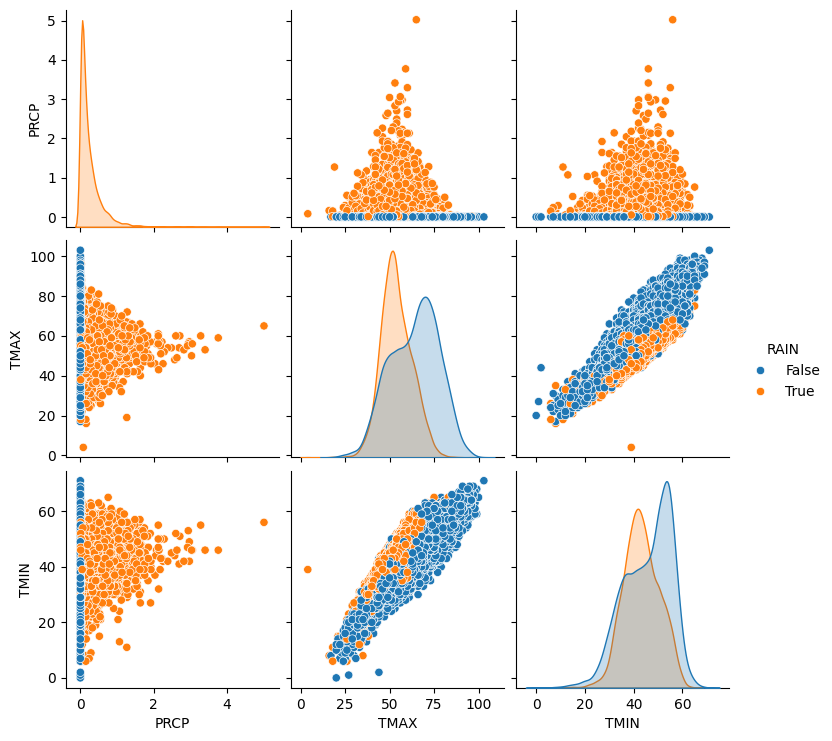

In [36]:
# pair plot
sns.pairplot(df, hue = 'RAIN')

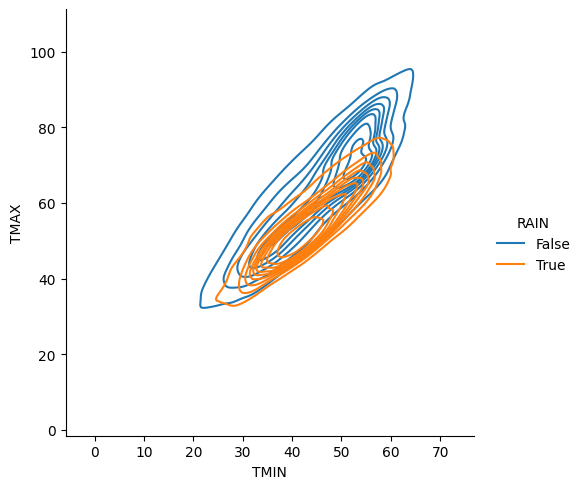

In [37]:
# displot
sns.displot(data=df, x='TMIN', y='TMAX', hue='RAIN', kind='kde')


In [39]:
 #Make the RAIN column numeric
df['RAIN'] = df['RAIN'].astype(int)

In [40]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1


In [41]:
# import model and classification report
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

In [42]:
# split the dataset into x and y
x = df[['PRCP', 'TMAX', 'TMIN']]
y = df['RAIN']

In [43]:
y.shape, x.shape

((25548,), (25548, 3))

In [44]:
# split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


LOGISTIC REGRESSION

In [59]:
# Testing the accuracy of the dataset on a logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
prediction_logistic = logistic.predict(x_test)
print(classification_report(y_test, prediction_logistic))
print('Confusion Matrix Score\n')
print(confusion_matrix(y_test, prediction_logistic))
print('\n\nAccuracy Score\n')
acc=accuracy_score(y_test, prediction_logistic)
print(acc)



              precision    recall  f1-score   support

           0       0.89      1.00      0.94      2953
           1       1.00      0.84      0.91      2157

    accuracy                           0.93      5110
   macro avg       0.94      0.92      0.93      5110
weighted avg       0.94      0.93      0.93      5110

Confusion Matrix Score

[[2944    9]
 [ 350 1807]]


Accuracy Score

0.9297455968688846


DECISION TREE

In [60]:
# Testing the accuracy of the dataset on a decision tree model
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
prediction_dtree = decision_tree.predict(x_test)
print(classification_report(y_test, prediction_dtree))
print("Confusion Matrix Score\n")
print(confusion_matrix(y_test, prediction_logistic))
print('\n\nAccuracy Score\n')
acc=accuracy_score(y_test, prediction_dtree)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2953
           1       1.00      1.00      1.00      2157

    accuracy                           1.00      5110
   macro avg       1.00      1.00      1.00      5110
weighted avg       1.00      1.00      1.00      5110

Confusion Matrix Score

[[2944    9]
 [ 350 1807]]


Accuracy Score

1.0


RANDOM FOREST

In [61]:
# Testing the accuracy of the dataset on a random forest model
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier()
rforest.fit(x_train, y_train)
prediction_rforest = rforest.predict(x_test)
print(classification_report(y_test, prediction_rforest))
print("Confusion Matrix Score\n")
print(confusion_matrix(y_test, prediction_rforest))
print('\n\nAccuracy Score\n')
acc=accuracy_score(y_test, prediction_rforest)
print(acc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2953
           1       1.00      1.00      1.00      2157

    accuracy                           1.00      5110
   macro avg       1.00      1.00      1.00      5110
weighted avg       1.00      1.00      1.00      5110

Confusion Matrix Score

[[2953    0]
 [   0 2157]]


Accuracy Score

1.0


ARTIFICIAL NEURAL NETWORK (ANN)

In [62]:
# Testing the accuracy of the dataset on an ANN
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier()
ann.fit(x_train, y_train)
prediction_ann = ann.predict(x_test)
print(classification_report(y_test, prediction_ann))
print("Confusion Matrix Score\n")
print(confusion_matrix(y_test, prediction_ann))
print('\n\nAccuracy Score\n')
acc=accuracy_score(y_test, prediction_ann)
print(acc)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2953
           1       1.00      1.00      1.00      2157

    accuracy                           1.00      5110
   macro avg       1.00      1.00      1.00      5110
weighted avg       1.00      1.00      1.00      5110

Confusion Matrix Score

[[2953    0]
 [   0 2157]]


Accuracy Score

1.0


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


CONVOLUTIONAL NEURAL NETWORK

In [63]:
# Testing the accuracy of the dataset on a convolutional neural network (deep learning)
from sklearn.neural_network import MLPClassifier
cnn = MLPClassifier()
cnn.fit(x_train, y_train)
prediction_cnn = cnn.predict(x_test)
print(classification_report(y_test, prediction_cnn))
print("Confusion Matrix Score\n")
print(confusion_matrix(y_test, prediction_cnn))
print('\n\nAccuracy Score\n')
acc=accuracy_score(y_test, prediction_cnn)
print(acc)




              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2953
           1       1.00      1.00      1.00      2157

    accuracy                           1.00      5110
   macro avg       1.00      1.00      1.00      5110
weighted avg       1.00      1.00      1.00      5110

Confusion Matrix Score

[[2953    0]
 [   0 2157]]


Accuracy Score

1.0


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
